# Найти и подготовить набор данных для решения задачи кластеризации.

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import fcluster



data = pd.read_csv('miami-housing.csv', sep=',')
data.head()

# Удаляем столбец 'PARCELNO', так как он является идентификатором и не влияет на кластеризацию
data_cleaned = data.drop(columns=['PARCELNO'], axis=1)

# Приводим все числовые признаки к стандартному виду (среднее = 0, стандартное отклонение = 1)
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data_cleaned)

data_standardized_df = pd.DataFrame(data_standardized, columns=data_cleaned.columns)
data_standardized_df.head()

,LATITUDE,LONGITUDE,SALE_PRC,LND_SQFOOT,TOT_LVG_AREA,SPEC_FEAT_VAL,RAIL_DIST,OCEAN_DIST,WATER_DIST,CNTR_DIST,SUBCNTR_DI,HWY_DIST,age,avno60plus,month_sold,structure_quality
0,1.153532,1.871328,0.126285,0.124240,-0.374974,-0.688421,-0.895569,-1.073043,-0.973193,-0.802161,-0.152197,1.356321,1.717578,-0.123109,0.407151,0.442866
1,1.155620,1.945244,-0.160597,0.124240,-0.421685,-0.688421,-0.645771,-1.195979,-0.974014,-0.780616,-0.170324,1.713909,1.528474,-0.123109,0.710053,0.442866
2,1.155690,1.947800,1.261204,0.124240,0.267920,2.854008,-0.637063,-1.200202,-0.977425,-0.779819,-0.170856,1.726350,1.433921,-0.123109,-1.410257,0.442866
3,1.158752,1.959935,1.853884,0.630840,-0.000055,0.033873,-0.609205,-1.223937,-1.002323,-0.771474,-0.166592,1.778074,1.528474,-0.123109,0.710053,0.442866
4,1.159178,1.937710,1.119339,0.688502,-0.459791,0.512474,-0.693636,-1.185271,-0.974953,-0.777654,-0.160834,1.677394,0.535674,-0.123109,0.104250,0.442866


In [ ]:
# Проверка наличия пропущенных значений в исходных данных
missing_values = data.isnull().sum()

# Отображение количества пропущенных значений по каждому столбцу
missing_values

,0
LATITUDE,0
LONGITUDE,0
PARCELNO,0
SALE_PRC,0
LND_SQFOOT,0
TOT_LVG_AREA,0
SPEC_FEAT_VAL,0
RAIL_DIST,0
OCEAN_DIST,0
WATER_DIST,0


# Реализация алгоритмов кластеризации:
*   k-means
*   Иерархическая кластеризация
*   DBSCAN

#Определение количества кластеров:
*   Метод локтя
*   Коэффициент силуэта

#**K-MEANS**

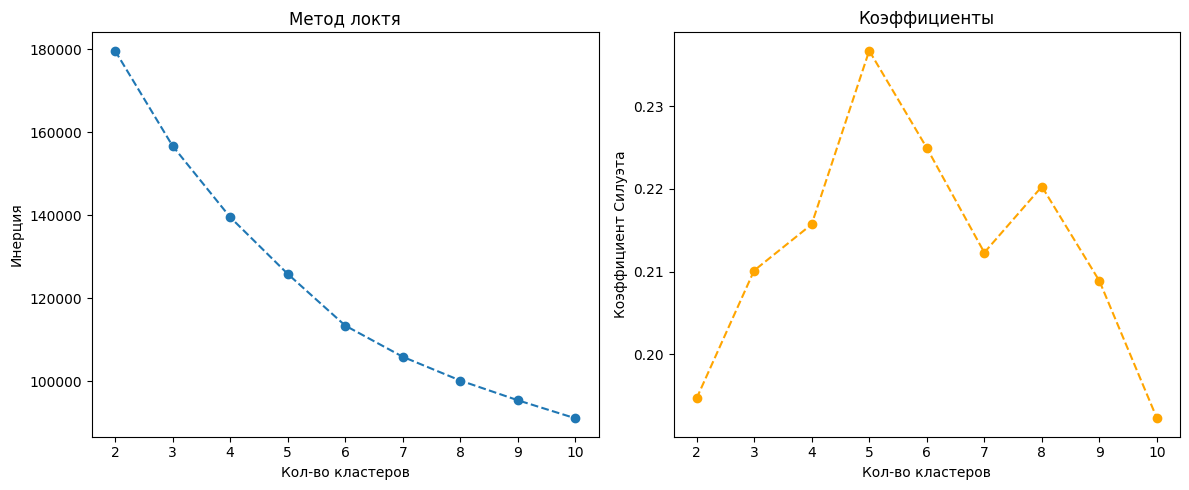

In [ ]:
# Определим оптимальное кол-во кластеров с помощью Метода локтяя
inertia = []
silhouette_scores = []
cluster_range = range(2, 11)  # Посмотрим на кол-ве кластеров от 2 до 10

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_standardized_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_standardized_df, kmeans.labels_))

plt.figure(figsize=(12, 5))

# Метод локтя
plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o', linestyle='--')
plt.title('Метод локтя')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Инерция')

# Коэффициент силуэта
plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color='orange')
plt.title('Коэффициенты')
plt.xlabel('Кол-во кластеров')
plt.ylabel('Коэффициент Силуэта')

plt.tight_layout()
plt.show()

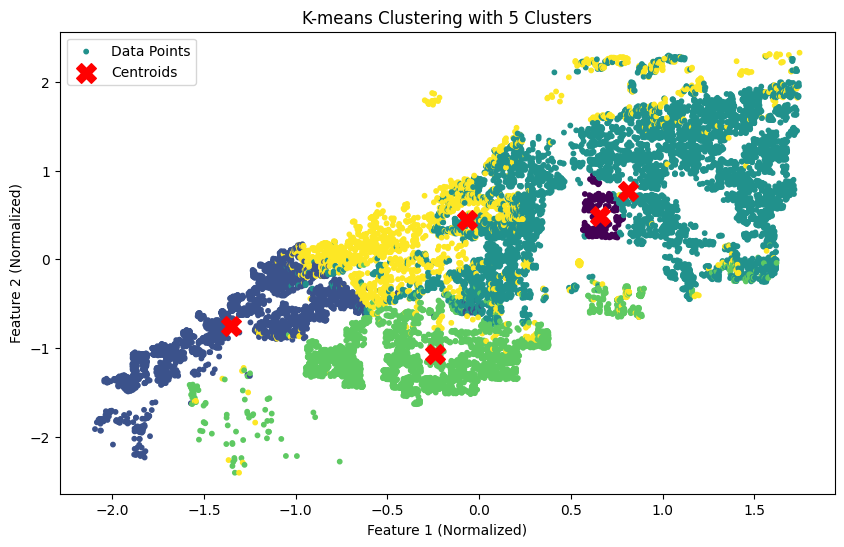

In [ ]:
# Выполняем k-means с указанием 5 кластеров
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(data_standardized_df)
data_standardized_df['Cluster_kmeans'] = kmeans.labels_


plt.figure(figsize=(10, 6))
plt.scatter(data_standardized_df.iloc[:, 0], data_standardized_df.iloc[:, 1],
            c=data_standardized_df['Cluster_kmeans'], cmap='viridis', s=10, label='Data Points')

# Обозначаем центроиды
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('K-means Clustering with 5 Clusters')
plt.xlabel('Feature 1 (Normalized)')
plt.ylabel('Feature 2 (Normalized)')
plt.legend()
plt.show()

#**Иерархическая кластеризация**

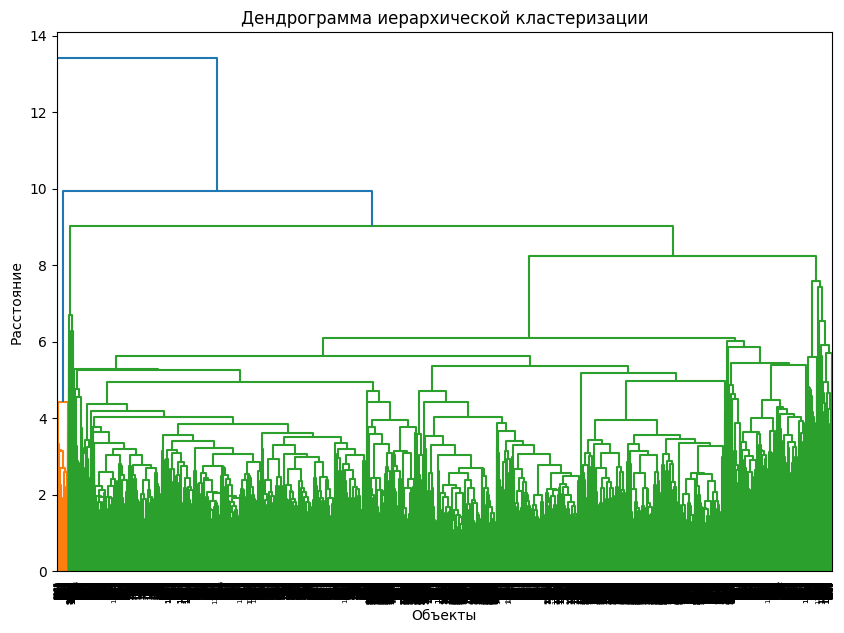

In [ ]:
# Строим дендрограмму
Z = linkage(data_standardized_df, method='average')

plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Объекты')
plt.ylabel('Расстояние')
plt.show()

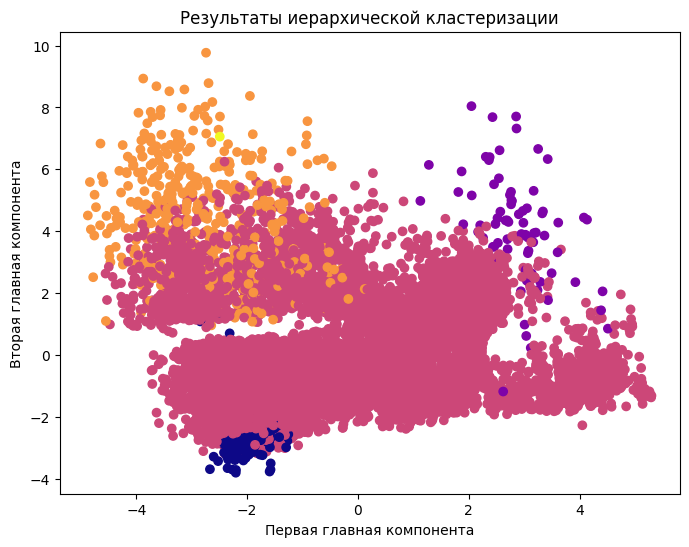

In [ ]:
# Понижаем размерность с помощью РСА
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_standardized_df)

# Делим на 5 кластеров
clusters = fcluster(Z, 5, criterion='maxclust')

plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=clusters, cmap='plasma', marker='o')
plt.title('Результаты иерархической кластеризации')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()

#**DBSCAN**

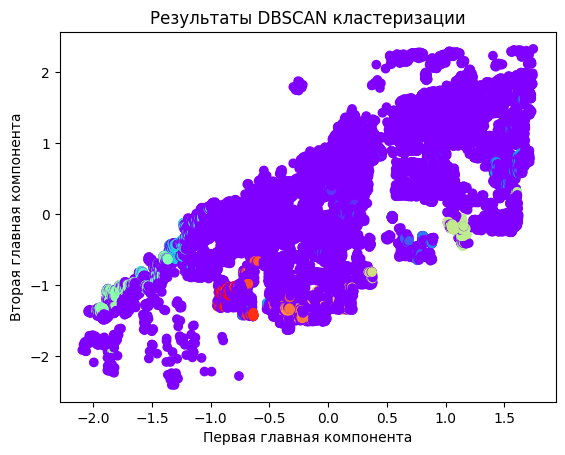

In [ ]:
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data_cleaned)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data_normalized)


labels = dbscan.labels_

data_cleaned['Cluster_DBSCAN'] = labels


plt.scatter(data_normalized[:, 0], data_normalized[:, 1], c=labels, cmap='rainbow', marker='o')
plt.title('Результаты DBSCAN кластеризации')
plt.xlabel('Первая главная компонента')
plt.ylabel('Вторая главная компонента')
plt.show()

#Сравнение результатов

In [ ]:
# k-means
kmeans = KMeans(n_clusters=3, random_state=42) #n_clusters=3
kmeans.fit(data_normalized)
kmeans_labels = kmeans.labels_
kmeans_silhouette = silhouette_score(data_normalized, kmeans_labels)

# Иерархическая кластеризация
Z = linkage(data_normalized, method='average')
hierarchical_labels = fcluster(Z, 3, criterion='maxclust') #num of clusters=3
hierarchical_silhouette = silhouette_score(data_normalized, hierarchical_labels)

# DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=10) #eps=0.3, min_samples=10
dbscan.fit(data_normalized)
dbscan_labels = dbscan.labels_
dbscan_silhouette = silhouette_score(data_normalized, dbscan_labels)

# Вывод средних коэффициентов силуэта для каждого алгоритма
print(f"K-means silhouette: {kmeans_silhouette}")
print(f"Hierarchical silhouette: {hierarchical_silhouette}")
print(f"DBSCAN silhouette: {dbscan_silhouette}")

K-means silhouette: 0.20075321099639193
Hierarchical silhouette: 0.4314011344566629
DBSCAN silhouette: 0.048874981746479716
